* **I : Exploration**

In [58]:
Data <- read.csv(file.path("..","data","training_data.csv")) # load the data
Data <- na.omit(Data) # suppress all NAs values
Data<-Data[, -3] #remove sweet or sour
dim(Data)
head(Data)

[1]  708 4871

,Intensity,VALENCE.PLEASANTNESS,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,low,45,302.0,208.33,5.952,19.698,34.491,21.523,39.571,0.563,⋯,0,0,1,0,1,0,1,0,1,0
2,high,49,72.6,122.18,6.431,11.349,18.745,12.261,21.285,0.597,⋯,0,0,0,0,0,0,0,0,0,0
3,high,56,259.0,242.29,7.572,20.832,32.167,21.693,35.535,0.651,⋯,0,0,1,0,1,1,1,0,1,1
4,high,7,56.6,88.12,6.294,7.537,14.189,7.955,16.080,0.538,⋯,0,0,0,0,0,0,0,0,0,0
5,low,51,84.7,136.21,6.191,12.876,21.629,14.023,24.701,0.585,⋯,0,0,0,0,0,0,0,0,0,0
6,high,21,160.0,192.28,6.409,17.644,29.723,19.000,33.740,0.588,⋯,0,0,0,0,1,0,1,0,1,0


At first sight , we have 4870 predictors to predict pleansantness somes are qualitative (itensity is defined by High or low)
and other are numeric.
Let's see the influence of intensity into Valence pleasantness in order to know if we have to keep it as a predictor.  

* Look at boxplot of pleansantness vs Intensity

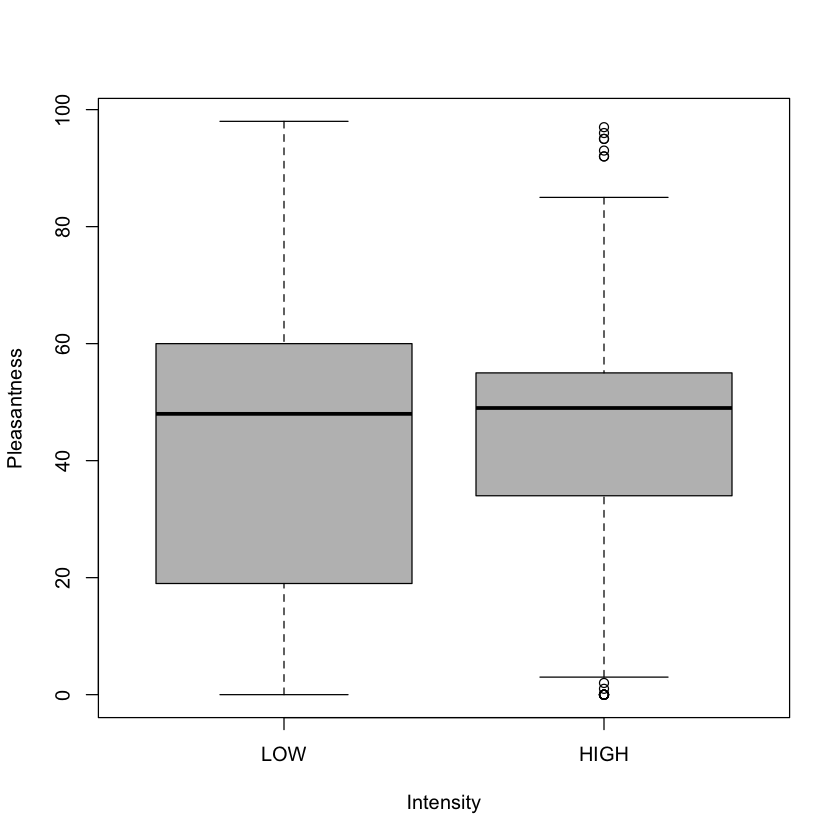

In [59]:
plot(Data$Intensity, Data$VALENCE.PLEASANTNESS, xlab='Intensity', ylab='Pleasantness', col='gray', xaxt='n', )
axis(1,c(1,2),c("LOW","HIGH"))


*INTERPRETATION* : 

We can see that the samples with high intensity are not considered very pleasant (pleasantness between 30 to 50). The samples that have a low intensity have a bigger range of pleasantness (20 to 60). Moreover, the mean pleasantness between intense and not intense smell is nearly the same (around 48). 

As we see, Intensity seems to have a relation with pleasantness, so we have to change the Low, high Intensity value to binary value (low=0 and high =1) in order to used it as predictor

In [60]:
lookup <- c("low" = 1, "high" = 0)
Data$Intensity <- lookup[Data$Intensity]
head(Data)


,Intensity,VALENCE.PLEASANTNESS,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,45,302.0,208.33,5.952,19.698,34.491,21.523,39.571,0.563,⋯,0,0,1,0,1,0,1,0,1,0
2,1,49,72.6,122.18,6.431,11.349,18.745,12.261,21.285,0.597,⋯,0,0,0,0,0,0,0,0,0,0
3,1,56,259.0,242.29,7.572,20.832,32.167,21.693,35.535,0.651,⋯,0,0,1,0,1,1,1,0,1,1
4,1,7,56.6,88.12,6.294,7.537,14.189,7.955,16.080,0.538,⋯,0,0,0,0,0,0,0,0,0,0
5,0,51,84.7,136.21,6.191,12.876,21.629,14.023,24.701,0.585,⋯,0,0,0,0,0,0,0,0,0,0
6,1,21,160.0,192.28,6.409,17.644,29.723,19.000,33.740,0.588,⋯,0,0,0,0,1,0,1,0,1,0


* let's look at somes predictors in our data 

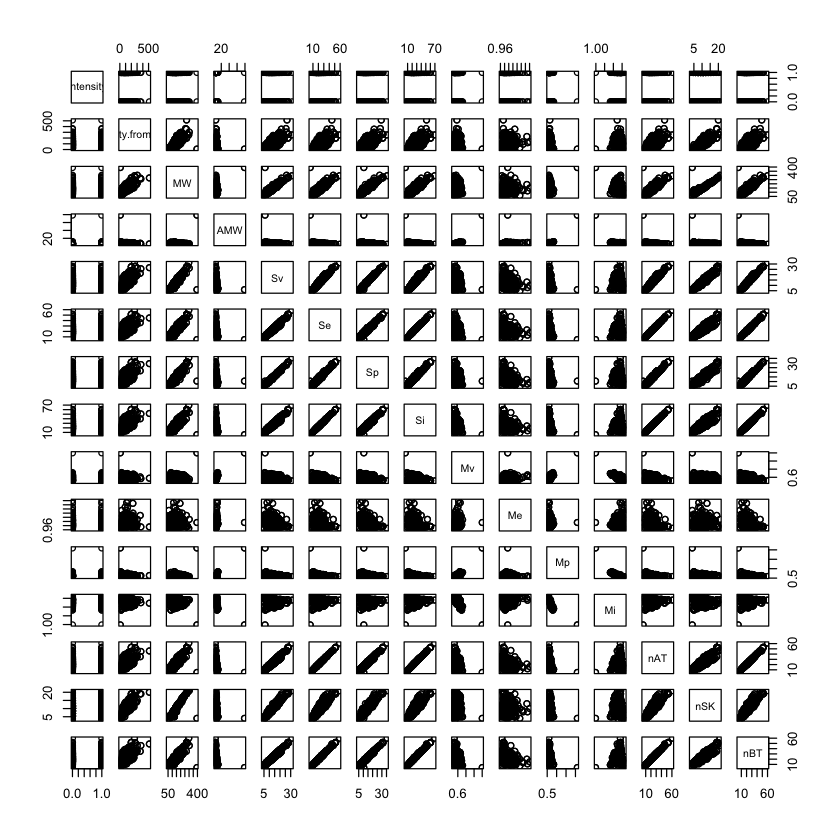

In [5]:
Data.x<-Data[, -2]
pairs(Data.x[, (1:15)] )

--> we can see some linear interaction bewteem SV, Se, Sp and Si, MW , nAT, nSK, nBTand Complexity from pubmed

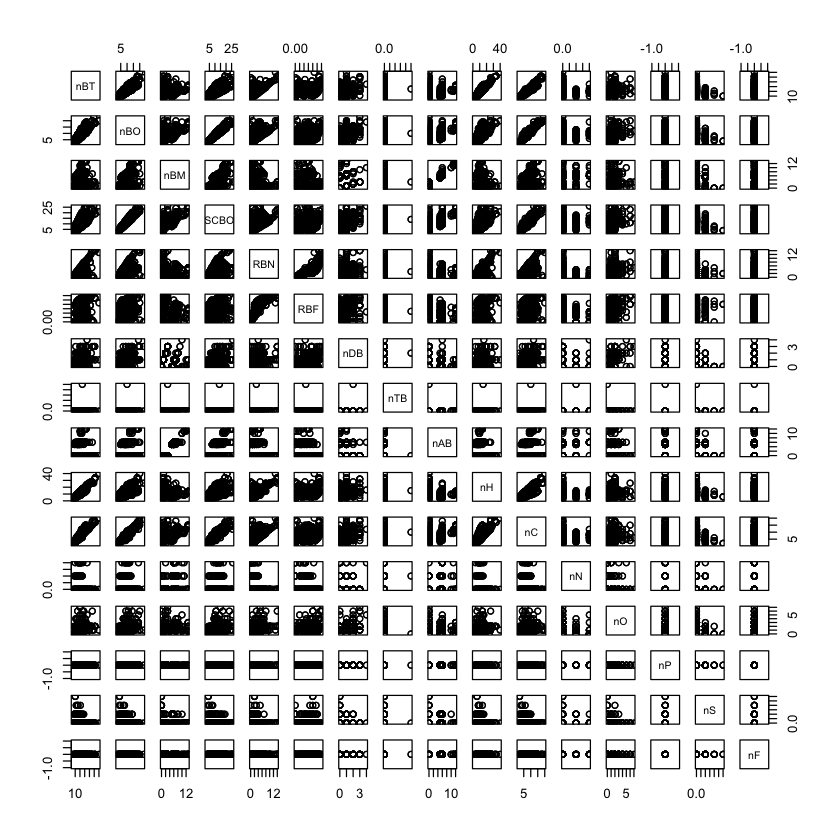

In [7]:
pairs(Data.x[, 15:30])

--> we can see some linear interaction bewteem nBT, nBO, SCBC, nH, nC. 

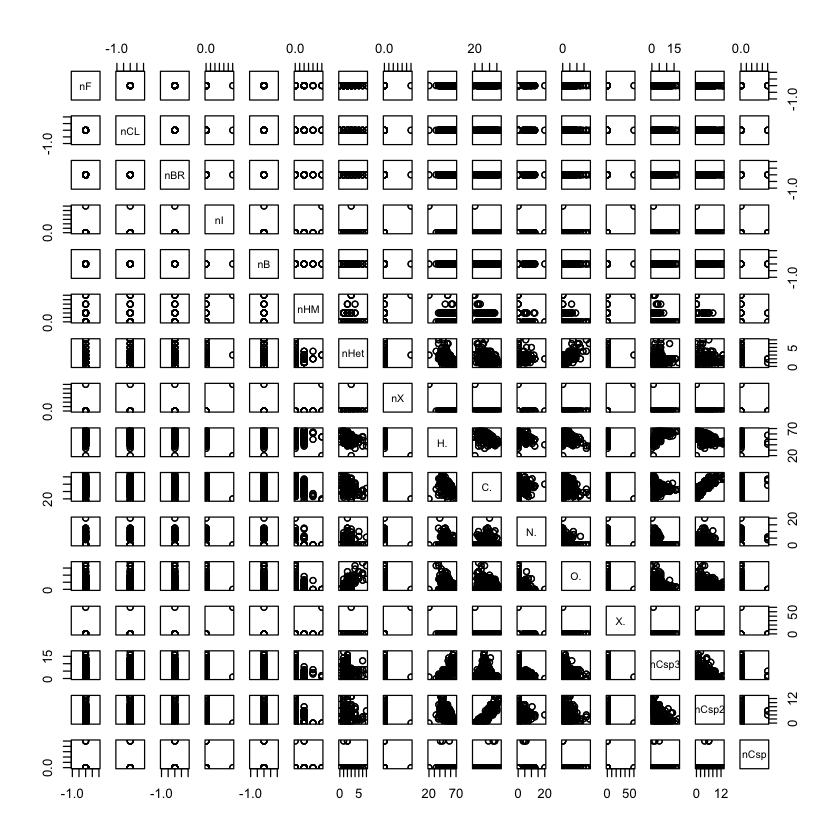

In [8]:
pairs(Data.x[, 30:45])

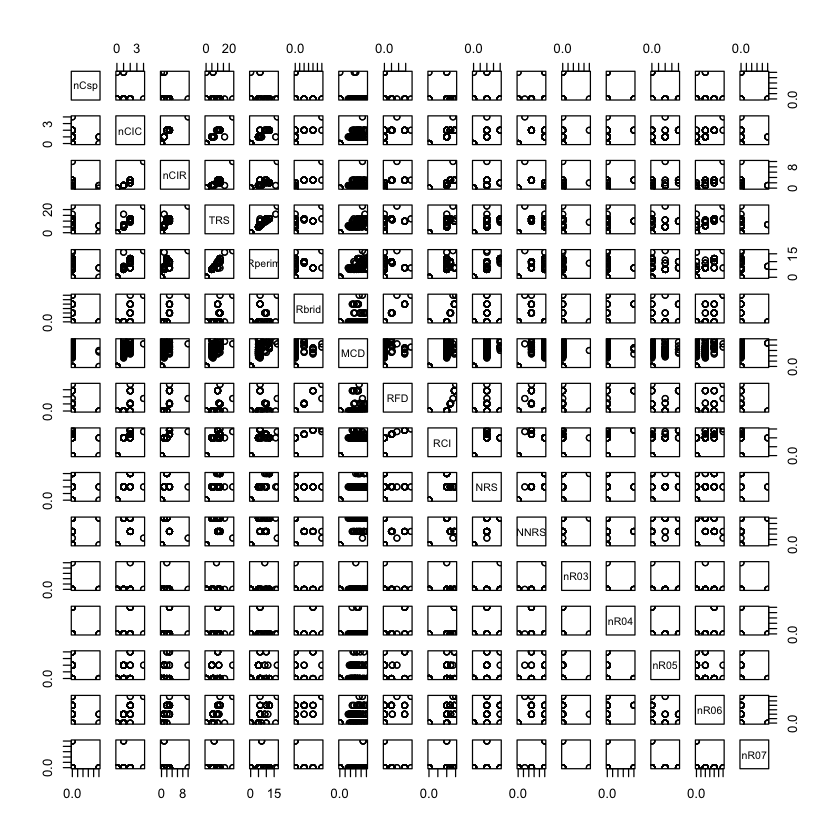

In [9]:
pairs(Data.x[, 45:60])

The visualization of 60 predictors of our data shows that it existe some linear relashionships between the predictors. 
Lets clean our data in order to reduce the number of predictors.

Statistical analysis of the data : we supress the predictors with a null variance (do not have any effect on pleasantness)  and the correlated columns. 
We also perform normalization of our data. 


In [78]:
library(caret)


data <- Data[, which(apply(Data, 2, var)!=0)] # supress columns with var == 0 
data.pred<-data[, -2]
cormat<- cor(data.pred) 
highly_corr <- findCorrelation(cormat, 0.95) # find correlated columns 
data.x <- data.pred[,-c(highly_corr)] # suppress correlated columns 
data_f<-data.frame(pleasantness=data[, 2], data.x)
data_final<-as.data.frame(scale(data_f)) # normalization 

dim(data_final)
head(data_final)


[1]  708 1196

,pleasantness,Intensity,complexity.from.pubmed,Mv,Me,Mp,Mi,RBN,RBF,nDB,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.06138675,-0.9992935,2.6970565,-0.1749820,-0.4597345,-0.10476907,-0.04988752,0.2387692,-0.2621597,1.3212848,⋯,-0.210203,-0.07532458,4.1960309,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472
2,0.23351276,0.9992935,-0.6008589,0.3757719,-0.3623984,0.21699136,-0.71975646,-0.8004638,-0.9580438,-1.1275886,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
3,0.53473329,0.9992935,2.0788770,1.2504987,0.5136269,0.57092783,-1.32872823,0.5851802,0.2297583,0.0968481,⋯,4.750587,-0.07532458,4.1960309,-0.05318703,2.1071008,7.6103928,2.5539556,-0.07532458,1.478546,10.80901225
4,-1.57381039,0.9992935,-0.8308791,-0.5799480,0.9516395,-0.60886041,1.04626166,-0.8004638,-0.6700918,0.0968481,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
5,0.31957577,-0.9992935,-0.4269060,0.1813882,-0.5570707,0.13118857,-0.53706493,-0.4540528,-0.5021197,-1.1275886,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
6,-0.97136934,0.9992935,0.6556267,0.2299841,-0.1677261,0.08828718,-0.41527058,0.9315911,0.8056624,0.0968481,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472


We finally have 851 predictor instead of 4870. 
We can now start to find linear regression !

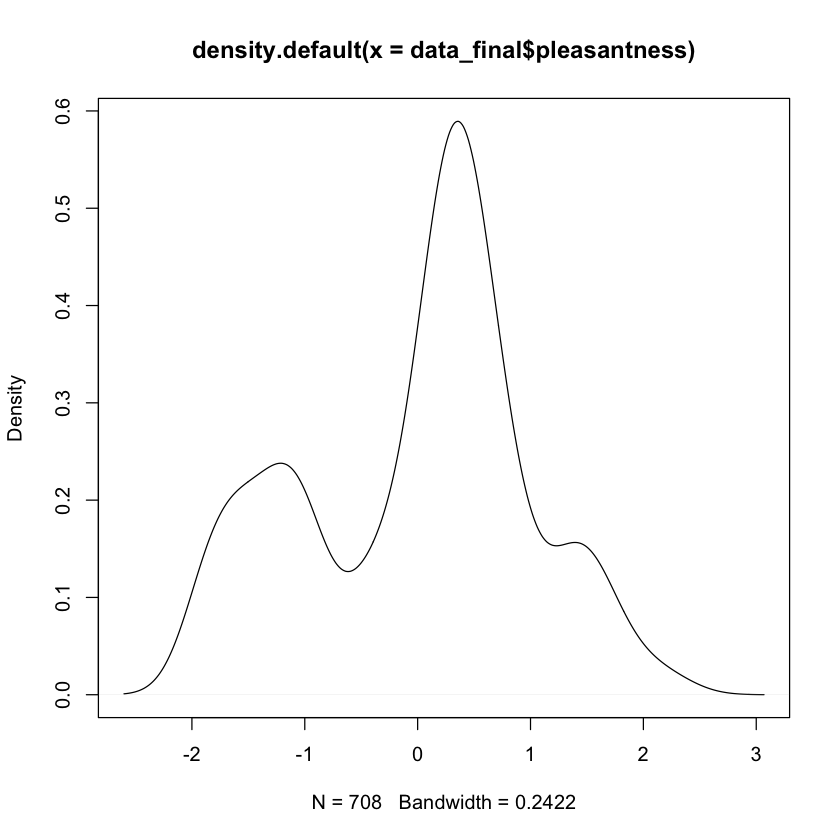

In [62]:
plot(density(data_final$pleasantness))

--> pleasantness does not have a Gaussian curve shape. It may be difficult to find a linear regression relashionship with simple linear method ..

* **II : LINEAR METHODE**

* divide the data between a training and a test set 

In [79]:
#creation train/test set

set.seed(1)

data.x<-(data_final[, -1])

data.y<-(data_final[, 1])
data<-cbind(data.y, data.x)




idx.train <- sample(nrow(data_final), nrow(data_final)*1/2)
X.train<- data.x[idx.train, ]
idx.zero.var <- apply(X.train, 2, var) ==0 # identify col with 0 variance 
data.train.x <- data.frame(X.train[, !idx.zero.var]) # supress the predictors with var == 0 

data.train.y<-data.y[idx.train]
data.train<-cbind(pleasantness=data.train.y, data.train.x)


X.test<- data.x[-idx.train, ]
data.test.x <- data.frame(X.test[, !idx.zero.var])  # supress the predictors with var == 0 in the train set 

data.test.y<-data.y[-idx.train]
data.test<-(cbind(pleasantness=data.test.y, data.test.x))


head(data.train)
head(data.test)

dim(data.train)

dim(data.test)

,pleasantness,Intensity,complexity.from.pubmed,Mv,Me,Mp,Mi,RBN,RBF,nDB,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
679,0.23351276,-0.9992935,-0.36508811,-0.9525168,-1.0924194,-0.4479802,0.4981871,1.9708241,1.6815165,0.0968481,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
129,0.40563878,-0.9992935,-1.13565594,-1.2440924,-0.9464152,-0.6517618,0.9244673,0.5851802,1.0096284,-1.1275886,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
509,0.01835525,-0.9992935,0.09495239,0.4729638,-0.5084026,0.3027941,-0.9024480,-0.4540528,-0.5501117,0.0968481,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,1.478546,-0.09238472
471,-0.02467626,-0.9992935,-0.19257292,1.0237177,-0.1190580,0.5494771,-1.3287282,-0.8004638,-0.8860558,0.0968481,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
299,0.14744976,0.9992935,0.26746758,0.7969367,0.1729504,0.3564209,-0.4152706,-0.8004638,-0.9580438,0.0968481,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
270,0.79292231,0.9992935,-0.16382039,0.4729638,0.4649588,0.1204632,-0.4152706,-0.8004638,-0.9940378,-1.1275886,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472


,pleasantness,Intensity,complexity.from.pubmed,Mv,Me,Mp,Mi,RBN,RBF,nDB,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,-1.5738104,0.9992935,-0.83087911,-0.5799480,0.9516395,-0.60886041,1.0462617,-0.8004638,-0.6700918,0.0968481,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
5,0.3195758,-0.9992935,-0.42690605,0.1813882,-0.5570707,0.13118857,-0.5370649,-0.4540528,-0.5021197,-1.1275886,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
6,-0.9713693,0.9992935,0.65562675,0.2299841,-0.1677261,0.08828718,-0.4152706,0.9315911,0.8056624,0.0968481,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472
7,0.5347333,-0.9992935,0.02307106,1.5096770,-0.2650623,0.88196291,-1.9985972,-0.4540528,-0.5981038,-1.1275886,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,-0.3909965,-0.07532458,1.478546,-0.09238472
8,0.3626073,-0.9992935,-1.28516910,-1.3574829,-1.6764363,-0.57668437,0.7417758,0.5851802,0.8056624,-1.1275886,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
9,0.4056388,-0.9992935,3.45899853,0.5701556,1.6816605,-0.07259303,0.5590842,0.2387692,-0.2261657,3.7701582,⋯,4.750587,-0.07532458,4.1960309,-0.05318703,2.1071008,7.6103928,2.5539556,13.25712685,1.478546,10.80901225


[1]  354 1188

[1]  354 1188

We get 2 new subset : both contain 844 predictors.

Run subset selection with foward regression method in order to reduce the number of predictors to perform multilinear regression 

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“226  linear dependencies found”
Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“nvmax reduced to  249”
Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement”


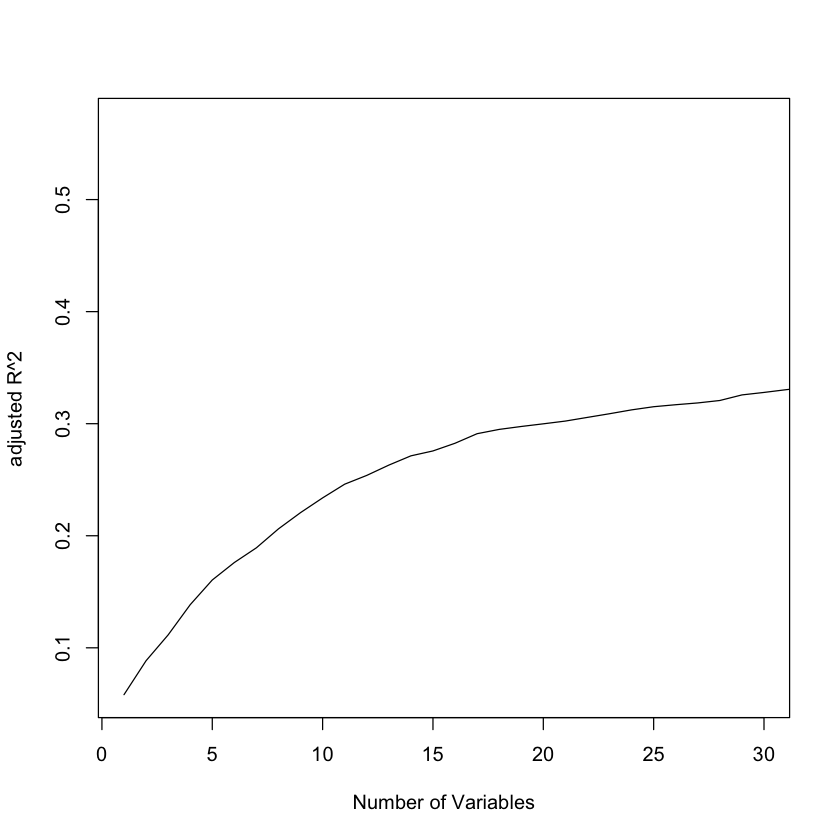

In [64]:
library(leaps)
regfit.fwd <- regsubsets(pleasantness~ ., data.train, method ='forward',  nvmax=845 )
regfit.fwd.summary <- summary(regfit.fwd)

# plot
plot(regfit.fwd.summary$adjr2, type = "l", xlim = c(1,30),
     xlab = "Number of Variables", ylab = "adjusted R^2")
adjr2.max <- which.max(regfit.fwd.summary$adjr2)
points(adjr2.max, regfit.fwd.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)

The value of the adjuste R-squared is too low, we choose not to use the outcome of this regression. 

 Lets try to run multilinear regression with all predictors (the 844 predictors) : 

In [80]:
fit1<-lm(pleasantness~. , data.train)
summary(fit1)


quality.of.fit <- function(fit, data) {
    RSS <- sum((data[, 1]- predict(fit, data))^2)
    TSS <- sum((data[, 1]- mean(data[, 1]))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}


Call:
lm(formula = pleasantness ~ ., data = data.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27078 -0.04168  0.00000  0.04168  1.27078 

Coefficients: (938 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)             5.283e+02  7.908e+02   0.668    0.506
Intensity              -4.171e-02  6.022e-02  -0.693    0.490
complexity.from.pubmed  5.247e+02  8.075e+02   0.650    0.517
Mv                      7.538e+03  1.164e+04   0.648    0.519
Me                      1.840e+03  2.909e+03   0.633    0.528
Mp                     -7.823e+03  1.211e+04  -0.646    0.520
Mi                     -5.228e+03  8.093e+03  -0.646    0.520
RBN                    -3.087e+03  4.807e+03  -0.642    0.522
RBF                     1.947e+03  3.039e+03   0.641    0.523
nDB                    -4.465e+02  6.923e+02  -0.645    0.520
nN                     -9.571e+01  1.377e+02  -0.695    0.488
nHet                   -9.481e+02  1.

NA values indicates that some of the variables are not defined because of singularity means that the variables are not linearly independent. 
If we  remove the variables that are giving NA, we  will obtain the same result for the rest of the variables. 
This is because the information given by those variables is already contained in the other variables and thus redundant.

In [81]:
names<-rownames(summary(fit1)$coefficients)


#submodel 1 :

fit2<-lm((pleasantness)~ .-1, (data.train[,c('pleasantness', names[-1])])) #we remove the intercept 
summary(fit2)
quality.of.fit(fit2, data.train)
quality.of.fit(fit2, data.test)
length(fit2$coefficient)


Call:
lm(formula = (pleasantness) ~ . - 1, data = (data.train[, c("pleasantness", 
    names[-1])]))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27407 -0.03878 -0.00021  0.03839  1.27403 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
Intensity              -3.844e-02  5.987e-02  -0.642    0.522
complexity.from.pubmed -1.374e+01  4.701e+01  -0.292    0.771
Mv                     -2.292e+02  5.682e+02  -0.403    0.688
Me                     -9.624e+01  2.361e+02  -0.408    0.684
Mp                      2.561e+02  6.530e+02   0.392    0.696
Mi                      1.724e+02  3.841e+02   0.449    0.654
RBN                     1.190e+02  2.635e+02   0.451    0.653
RBF                    -7.991e+01  1.665e+02  -0.480    0.632
nDB                     1.541e+01  3.315e+01   0.465    0.643
nN                     -4.059e+00  1.115e+01  -0.364    0.717
nHet                    6.520e+01  9.568e+01   0.681    0.497
H.                      1.622e+02  

Residual standard error:  0.830255169204346  R^2 =  0.796875402567307 
Residual standard error:  160.653356054003  R^2 =  -7731.73000779271 


[1] 249

The error is huge and the model is baed on 249 predictor and doesn't give us interesting predictor (p-value are high..)
Let's try to reduce the number of predictor with regularization

Lets try lassos regularization (L1 and L2)  and PCA to find the best predictors to perform multilinear regression :

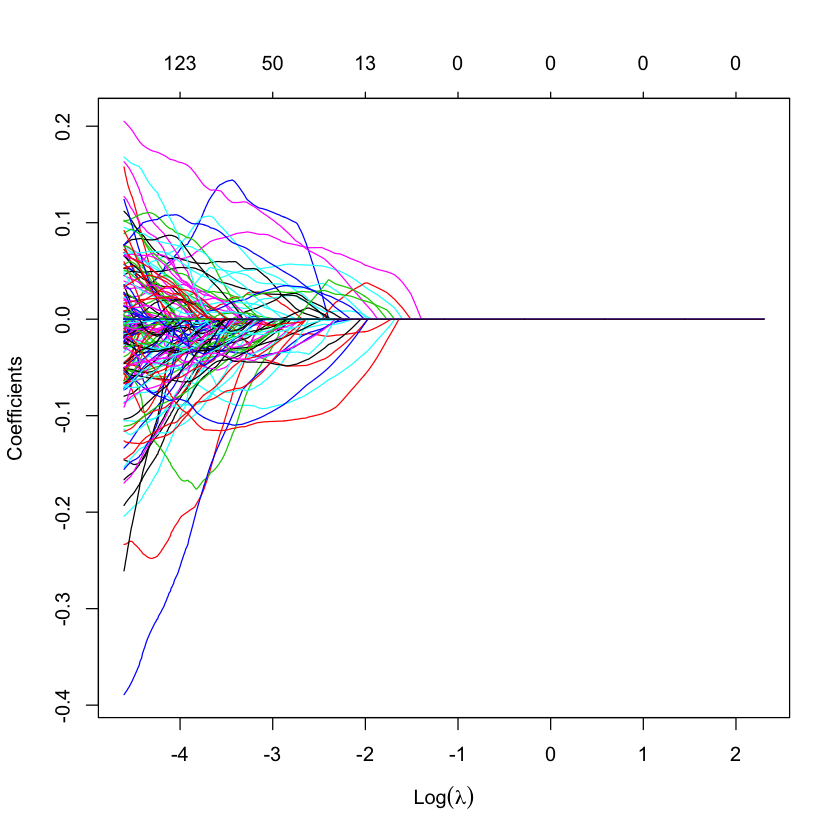

In [82]:
#L1 Regularization

library(glmnet)

grid =10^seq(1, -2, length = 800)
x.train<-as.matrix(data.train.x)
x.test<-as.matrix(data.test.x)

lasso.mod <- glmnet(x.train, data.train.y, alpha = 1, lambda = grid)
plot(lasso.mod, "lambda", xlab = parse(text = "Log(lambda)"))

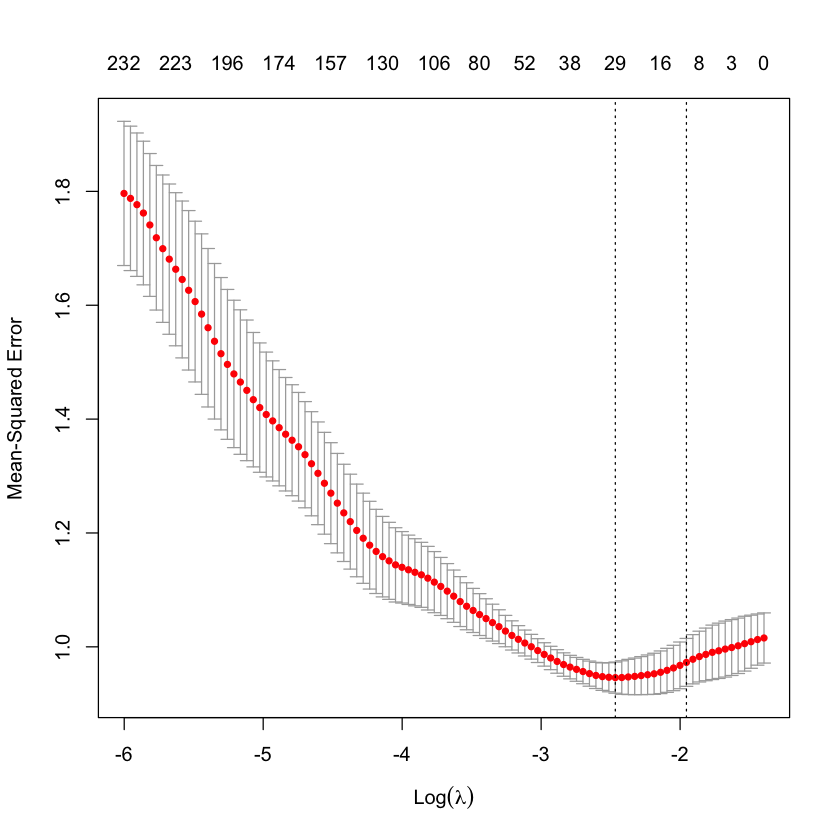

In [83]:
cv.lasso <- cv.glmnet(x.train, data.train.y, alpha = 1, nfold = 5)
plot(cv.lasso)

In [84]:
best.lasso <- glmnet(x.train, data.train.y, alpha = 1, lambda = cv.lasso$lambda.min)
bestlam = cv.lasso$lambda.min
length(colnames(data.train[, (which(abs(coef(best.lasso))>0))]))
lasso_pred1=predict(lasso.mod, s=bestlam, newx = x.train)
lasso_pred = predict(lasso.mod, s = bestlam, newx = x.test)
mean((lasso_pred1- data.train.y)^2)
mean((lasso_pred-data.test.y)^2)



[1] 31

[1] 0.7973435

[1] 0.8976978

--> Lasso regularization keep 28 predictor amoung the  of the data.train.x , the huge reduction of predictor clearly 
explaine the bad predictions of our models. However, it is the best submodel we find for linear model for now.

**INTERPRETATION :**


The resitual standard error is a little bit smaller than with multilinear regression on submodels, but is still quite high. 

In [25]:
#LASSO L2-REGULARIZATION 

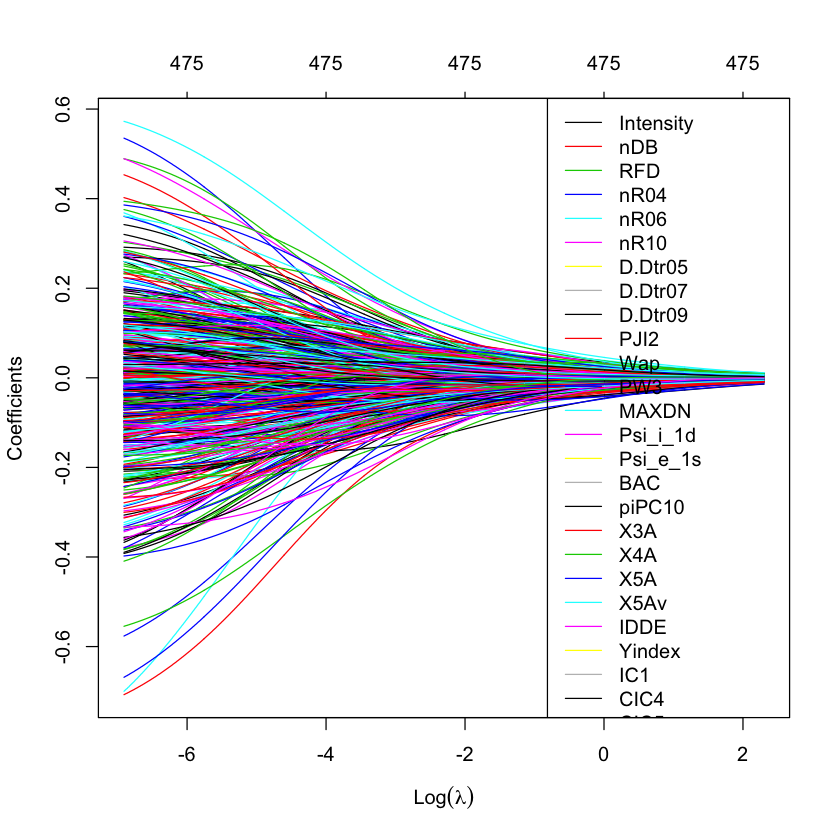

In [70]:
ridge.mod <- glmnet(x.train, data.train.y, alpha = 0, lambda = 10^seq(1, -3, length = 800))
plot(ridge.mod, "lambda", xlab = parse(text = "Log(lambda)"))
labs = names(ridge.mod$beta[,1]) # extract labels
legend('topright', legend=labs, col=1:length(labs), lty=1) # show legend with labels

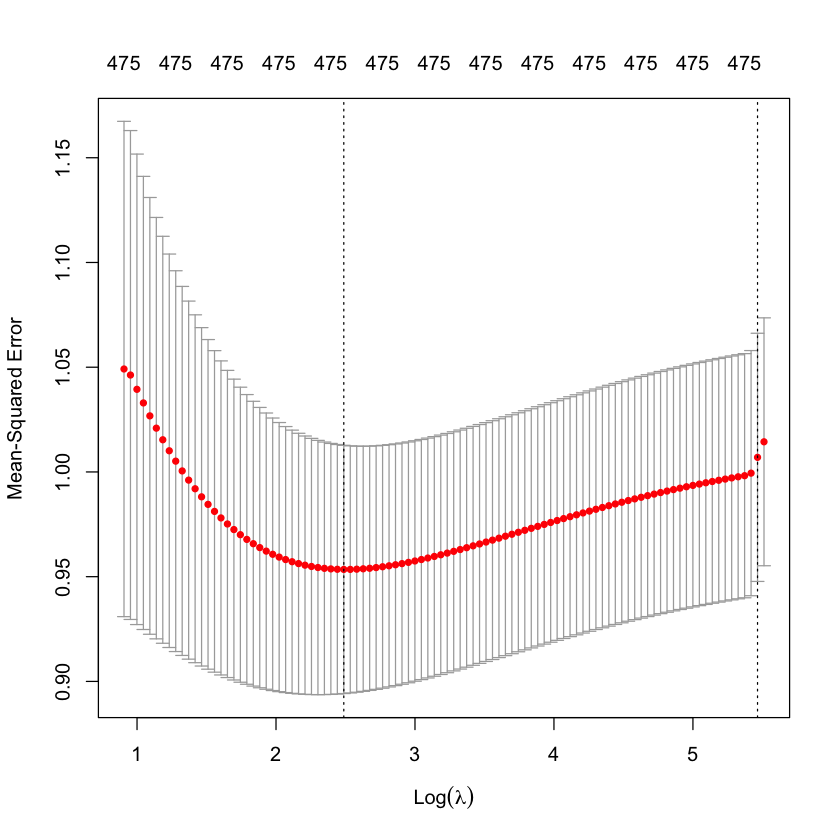

In [71]:
cv.lasso2 <- cv.glmnet(x.train, data.train.y,  alpha = 0, nfold = 50)
plot(cv.lasso2)


In [72]:
bestlam2 = cv.lasso2$lambda.min
best.lasso.1se <- glmnet(x.train, data.train.y, alpha = 0, lambda = bestlam2)


In [73]:
ridge_pred1 = predict(ridge.mod,  s = bestlam, newx = x.train)
ridge_pred = predict(ridge.mod,  s = bestlam, newx = x.test)
mean((ridge_pred1-data.train.y)^2)
mean((ridge_pred-data.test.y)^2)


[1] 0.3755666

[1] 1.015631

The MSE of the training set is much lower than the one found with L1-regularization. However, the MSE of the test set is a higher. 
We probably suppress to muche information from the predictor. let's try PCA in order to get around dimensionality issue.

Let's perfom PCA on data.train :

In [74]:
prin_comp <- prcomp(data.train.x, scale. = T, center =T)
summary(prin_comp)


Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     7.0411 6.35614 5.77220 4.93064 4.52499 3.72376 3.6793
Proportion of Variance 0.1044 0.08505 0.07014 0.05118 0.04311 0.02919 0.0285
Cumulative Proportion  0.1044 0.18943 0.25957 0.31075 0.35386 0.38305 0.4116
                           PC8     PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     3.57903 3.36133 3.16834 3.0742 2.92640 2.71500 2.70675
Proportion of Variance 0.02697 0.02379 0.02113 0.0199 0.01803 0.01552 0.01542
Cumulative Proportion  0.43852 0.46230 0.48344 0.5033 0.52136 0.53688 0.55230
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.66132 2.53869 2.48297 2.37891 2.34620 2.32146 2.30157
Proportion of Variance 0.01491 0.01357 0.01298 0.01191 0.01159 0.01135 0.01115
Cumulative Proportion  0.56722 0.58078 0.59376 0.60568 0.61727 0.62861 0.63976
                          PC22    PC23

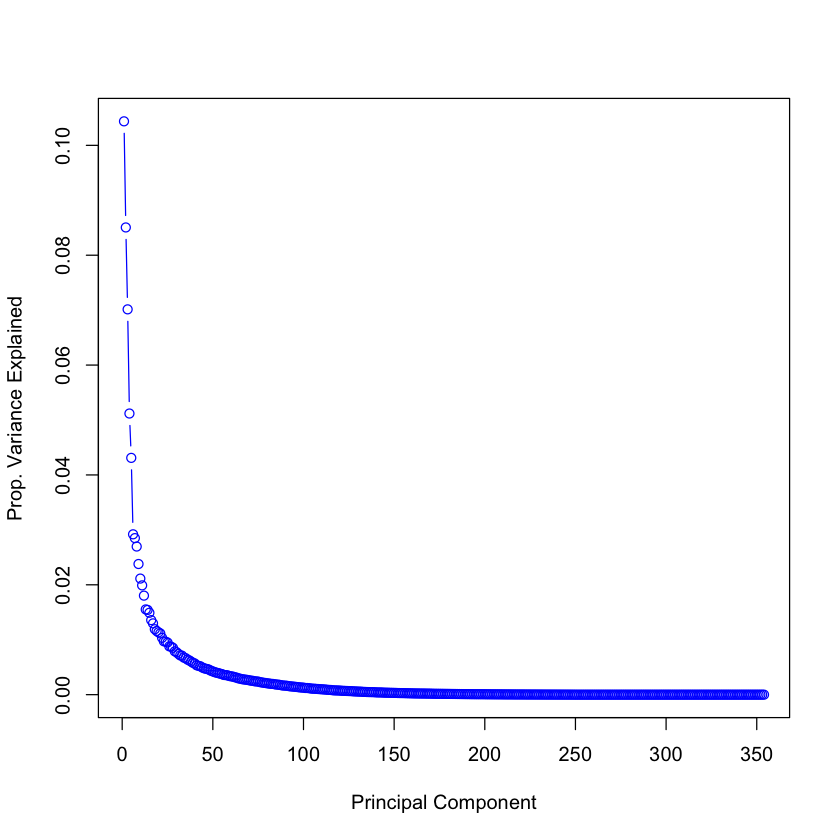

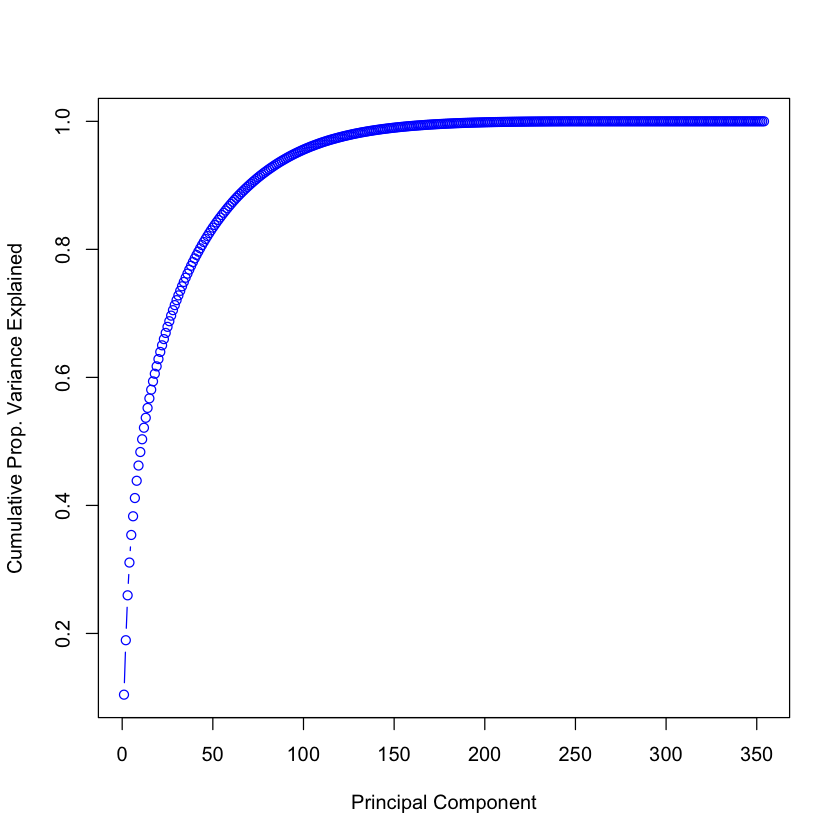

In [75]:
pca.var <- prin_comp$sdev^2
pca.vare <- pca.var / sum(pca.var)
plot(pca.vare, xlab = "Principal Component", ylab = "Prop. Variance Explained", col = "blue", type = "b")
plot(cumsum(pca.vare), xlab = "Principal Component", ylab = "Cumulative Prop. Variance Explained", col = "blue", type = "b")

In [76]:
(which(cumsum(pca.vare)>0.8))[1]

[1] 43

--> prenons les 35 premiers componentes qui suffisent a expliquer 80% de la variance .

In [77]:
#add a training set with principal components
train.data <- data.frame(pleasantness = data.train.y, prin_comp$x)

#we are interested in first 35 PCAs

train.data <- train.data[,1:44]


linearmod<-lm(pleasantness ~ .-1, train.data)
summary(linearmod)
#transform test into PCA

test.data <- predict(prin_comp, data.test)
test.data <- data.frame(pleasantness = data.test.y, test.data)


#select the first 35 components
test.data <- test.data[,1:44]


rpart.prediction <- predict(linearmod, test.data)


quality.of.fit <- function(fit, data) {
    RSS <- sum((data$pleasantness - predict(fit, data))^2)
    TSS <- sum((data$pleasantness- mean(data$pleasantness))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}

quality.of.fit(linearmod, train.data)
quality.of.fit(linearmod, test.data)


#training error  : 
1/length(train.data$pleasantness) * sum((train.data$pleasantness-rpart.prediction )^2)





Call:
lm(formula = pleasantness ~ . - 1, data = train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27137 -0.61639  0.08031  0.56279  2.02290 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
PC1  -0.015414   0.007076  -2.179  0.03012 *  
PC2  -0.020538   0.007838  -2.620  0.00922 ** 
PC3  -0.006404   0.008631  -0.742  0.45868    
PC4   0.014060   0.010104   1.392  0.16506    
PC5  -0.010885   0.011010  -0.989  0.32360    
PC6  -0.040454   0.013379  -3.024  0.00270 ** 
PC7  -0.007430   0.013540  -0.549  0.58359    
PC8  -0.001573   0.013920  -0.113  0.91011    
PC9  -0.020752   0.014821  -1.400  0.16246    
PC10 -0.021445   0.015724  -1.364  0.17360    
PC11  0.027964   0.016205   1.726  0.08542 .  
PC12  0.028119   0.017024   1.652  0.09960 .  
PC13 -0.055660   0.018350  -3.033  0.00262 ** 
PC14 -0.041614   0.018406  -2.261  0.02445 *  
PC15 -0.066509   0.018720  -3.553  0.00044 ***
PC16  0.020303   0.019624   1.035  0.30166    
PC17  0.025574   0.02

Residual standard error:  0.936014693058744  R^2 =  0.235326986797118 
Residual standard error:  1.01403055850462  R^2 =  0.0875135630769945 


[1] 1.200603

Lasso L1 regularization gives us the best result. 

Overall, the MSE of the linear methods we tested is very high.Those methods do not predict the pleasantness efficiently. 

* III : NON LINEAR METHOD (TREE)

In [85]:
library(caret)


data <- Data[, which(apply(Data, 2, var)!=0)] # supress columns with var == 0 
data.pred<-data[, -2]
cormat<- cor(data.pred) 
highly_corr <- findCorrelation(cormat, 0.9) # find correlated columns 
data.x <- data.pred[,-c(highly_corr)] # suppress correlated columns 
data_f<-data.frame(data$VALENCE.PLEASANTNESS, data.x)
data_final<-as.data.frame(scale(data_f)) # normalization 

data.x<-(data_final[, -1])
data.y<-(data_final[, 1])
data<-cbind(data.y, data.x)

idx.train <- sample(nrow(data_final), nrow(data_final)*1/2)
X.train<- data.x[idx.train, ]
idx.zero.var <- apply(X.train, 2, var) ==0 # identify col with 0 variance 
data.train.x <- data.frame(X.train[, !idx.zero.var]) # supress the predictors with var == 0 


data.train.y<-data.y[idx.train]
data.train<-cbind(pleasantness=data.train.y, data.train.x)


X.test<- data.x[-idx.train, ]
data.test.x <- data.frame(X.test[, !idx.zero.var])  # supress the predictors with var == 0 in the train set 


data.test.y<-data.y[-idx.train]
data.test<-(cbind(pleasantness=data.test.y, data.test.x))


Perform descision tree on our data : 

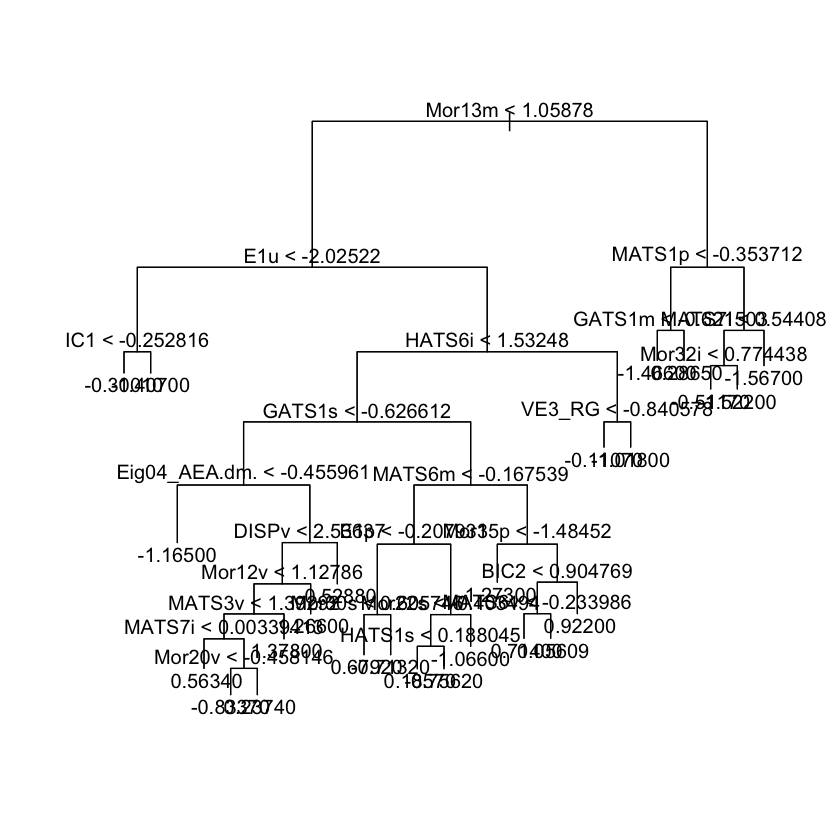

In [33]:
#DESCISION TREES 

library(tree)
p_tree <- tree(data.train$pleasantness ~ ., data.train, minsize = 1)
plot(p_tree)
text(p_tree)


In [34]:

mean((data.test[,'pleasantness']) - predict(p_tree, data.test))^2

[1] 0.001905254

Use prunned tree to find the optimal size of tree to predict our data : 

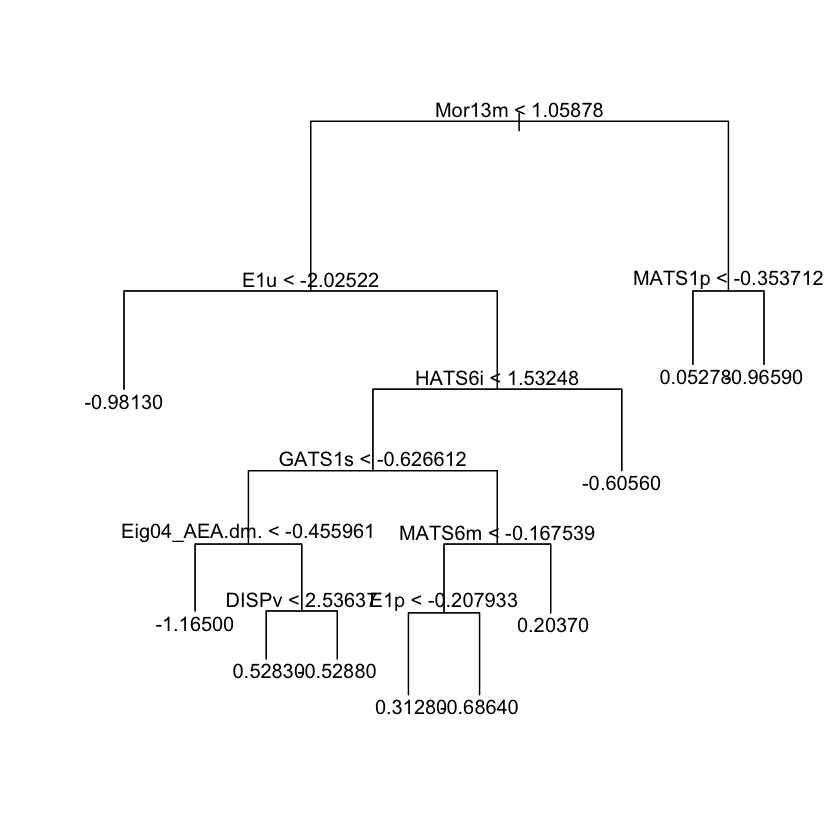

In [35]:
# prunned tree example of size 10 
prunned_p_tree <- prune.tree(p_tree, best = 10)
plot(prunned_p_tree)
text(prunned_p_tree)

In [36]:
dim(data)

mean((data.test[,'pleasantness']) - predict(prunned_p_tree, data.test))^2

[1] 708 852

[1] 0.001561224

In the following we define some functions to fit the data and run 6-fold cross-validation. We run 6-fold cross-validation,
because our training data has size 426, which is a multiple of 6.

In [37]:
# find the optimal tree size
p.train <- function(train) {
    tree(data.y ~ ., data, subset = train)
}

p.evaluate <- function(tree, set) {
    sapply(2:100, function(i) mean((data[set,'data.y']) - predict(prune.tree(tree, best = i), data[set,]))^2) # We compute the mean squared error for all trees with 2 to 100 leaf nodes.
}
p.cv <- function(train) {
    res <- sapply(1:6, function(v) {
                            idx.test <- seq((v-1)*71 + 1, v*71) # fold index : divide into 6 cross-fold 
                            this.fold.test <- train[idx.test]   # validation
                            this.fold.train <- train[-idx.test] # training
                            tree <- p.train(this.fold.train)
                            p.evaluate(tree, this.fold.test)
                        })
    rowMeans(data.frame(res))
}
           
p.train.and.evaluate <- function() { # method to evaluate the model of training, test and using cross-validation
    train <- sample(nrow(data), 426)
    tree <- p.train(train)
    list(train = p.evaluate(tree, train),
         test = p.evaluate(tree, -train),
         cv = p.cv(train),
         tree = tree)
}
set.seed(1)
res <- replicate(3, p.train.and.evaluate())# we run everything for 3 different training sets
           


Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best

Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-lengt

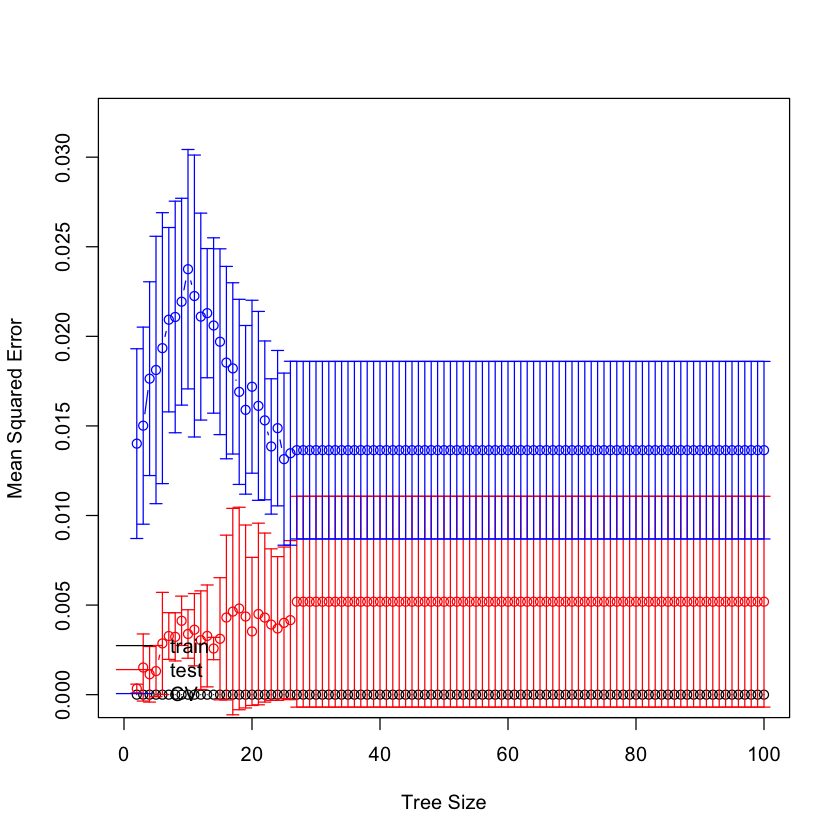

In [38]:

std.plot <- function(data, x = 2:100, ...) {
    df <- data.frame(data)
    m <- rowMeans(df)
    std <- sqrt(rowMeans((df - m)^2))
    points(x, m, type = "b", ...)
    arrows(x, m - std, x, m + std, length=0.05, angle = 90,  code=3, ...)
}
plot(c(),ylim = c(0,0.032), xlim = c(0, 100), xlab = "Tree Size", ylab = "Mean Squared Error")
std.plot(res[1,])
std.plot(res[2,], col = "red")
std.plot(res[3,], col = "blue")
legend("bottomleft", c("train", "test", "CV"), bty = 'n',
                     col = c("black", "red", "blue"), lty = 1)


We can deduce from the plot above that the optimal tree size is around 22.

lets plot this tree. 

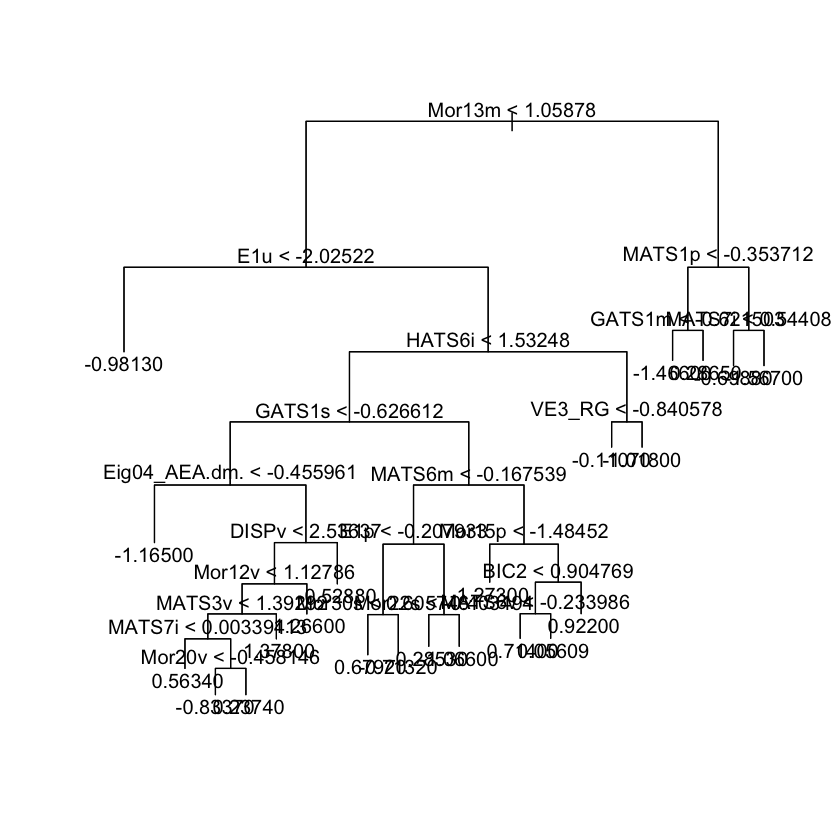

In [40]:
final.tree <- prune.tree(p_tree, best = 22)
plot(final.tree)
text(final.tree)


In [41]:
# Mean MSE for training set 
df <- data.frame(res[1,])
m <- rowMeans(df)
mean(m)

# Mean MSE for test set 
df <- data.frame(res[2,])
m <- rowMeans(df)
mean(m)

# Mean MSE for CV set 
df <- data.frame(res[3,])
m <- rowMeans(df)
mean(m)

[1] 8.943414e-34

[1] 0.004717113

[1] 0.01474789

The MSE found for training set is very low. The one for the test set is low but a lot hight than the MSe for training set. This method is maybe still a little bit too flexible. The MSE for tge cross validation set is the highest. However, regarding those MSE values, this method is quite efficient to predict valence pleasantness. 

In [ ]:
#Bangging and random forest

In [86]:
library(xgboost)
library(Matrix)

plea.train.x <- sparse.model.matrix( pleasantness~ . -1, data = data.train)
plea.test.x = sparse.model.matrix(pleasantness ~ . -1, data = data.test)
plea.train.y =data.train.y
plea.test.y =data.test.y

In [43]:
#Random forst
#By default, randomForest() uses p/3 variables when building a random forest of regression trees
library(randomForest)
set.seed(1)

m <- 844 
bag.pleas <- randomForest(pleasantness ~ ., data = data.train, mtry = m/3, ntree = 1000)
bag.pleas
pred.bag_test <- predict(bag.pleas, newdata = data.test)
pred.bag_train<-predict(bag.pleas, newdata = data.train)
mean((pred.bag_train - data.train.y)^2)
mean((pred.bag_test - data.test.y)^2)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(formula = pleasantness ~ ., data = data.train, mtry = m/3,      ntree = 1000) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 281

          Mean of squared residuals: 0.887874
                    % Var explained: 3.3

[1] 0.2097585

[1] 0.9944263

MSR is high and %Var explained is low--> overfitting with random forest

In [44]:

importance(bag.pleas)
which.max (importance(bag.pleas))
             



,IncNodePurity
Intensity,1.035434e+01
Mi,1.899838e-01
RBF,3.225195e-01
nDB,6.302329e-02
nHet,8.550875e-02
O.,3.074549e-01
nCIR,1.998729e-02
RFD,1.363351e-02
NNRS,1.297021e-02
nR04,3.958251e-04


[1] 1

in this model Intensity determine the Pleasantness, 
However, the test error is high as the Mean squared error for our model.
--> Pruned tree gives best predictions.

In [ ]:
#testons pour des valeur differentes de eta pour boosting. 

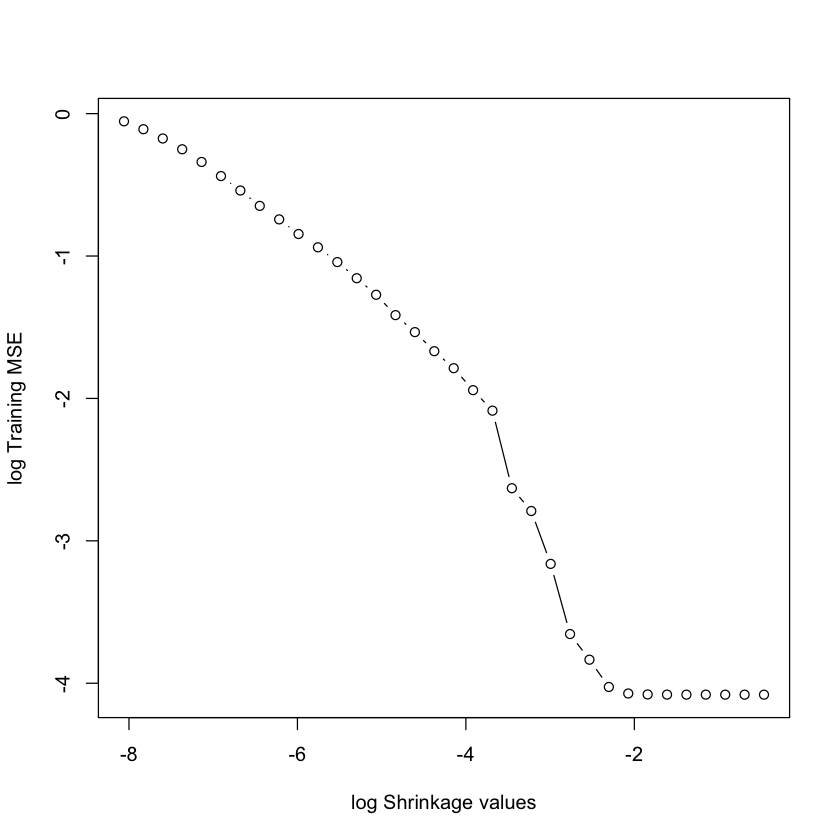

In [51]:
set.seed(1)
pows <- seq(-3.5, -0.2, by = 0.1)
lambdas <- 10^pows
train.err <- rep(NA, length(lambdas))
test.err <- rep(NA, length(lambdas))
for (i in 1:length(lambdas)) {
  boost.pleas <- xgboost(plea.train.x,
                           label=plea.train.y,
                           eta=lambdas[i],
                           objective="reg:squarederror",
                           max.depth=3,
                           nrounds=1000,
                           verbose = 0)
  pred.train <- predict(boost.pleas, plea.train.x)
  pred.test <- predict(boost.pleas, plea.test.x)
  train.err[i] <- mean((pred.train - plea.train.y)^2)
  test.err[i] <- mean((pred.test - plea.test.y)^2)
}
plot(log(lambdas), log(train.err), type="b", xlab="log Shrinkage values", ylab="log Training MSE")

In [52]:
min(train.err)
lambdas[which.min(train.err)]

[1] 0.016902

[1] 0.5011872

--> optimal shrinkage for data train is  λ≈0.5 and give us 

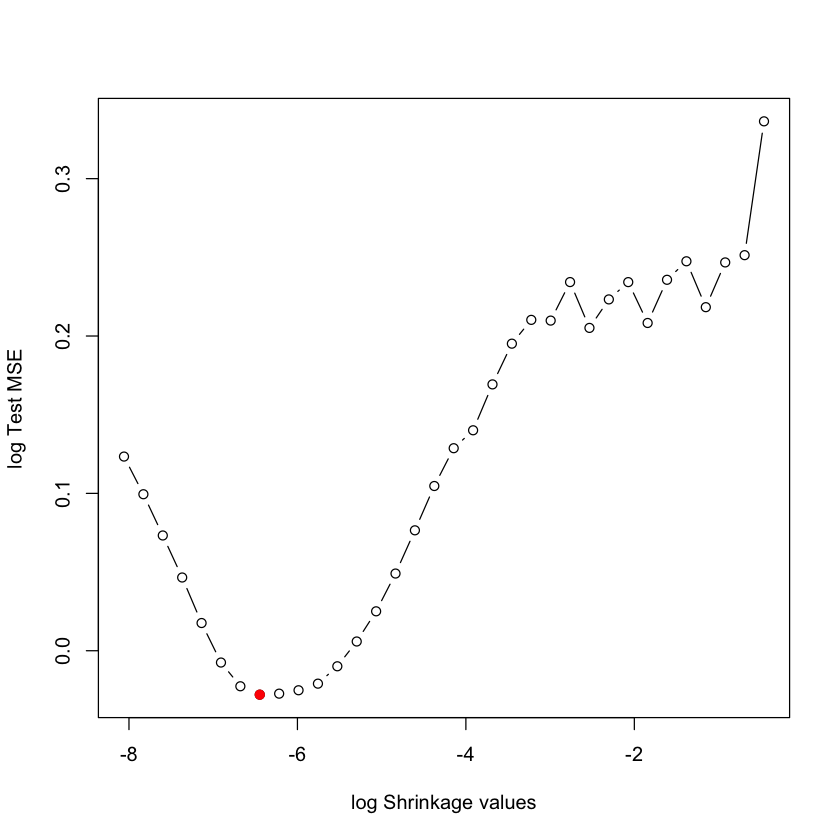

In [53]:
plot(log(lambdas), log(test.err), type="b", xlab="log Shrinkage values", ylab="log Test MSE")
points(log(lambdas[which.min(test.err)]), log(min(test.err)), col="red", pch=19)

In [48]:
min(test.err)
lambdas[which.min(test.err)]

[1] 0.9762184

[1] 0.01584893

-->  The optimal shrinkage is  λ≈0.016

In [87]:
boost.pleas = xgboost(plea.train.x, label = plea.train.y,
                      objective = "reg:linear",
                      eta = 0.016,
                      max_depth = 4,
                      nround = 10000)



[1]	train-rmse:1.162826 
[2]	train-rmse:1.161065 
[3]	train-rmse:1.159311 
[4]	train-rmse:1.157564 
[5]	train-rmse:1.155825 
[6]	train-rmse:1.154092 
[7]	train-rmse:1.152367 
[8]	train-rmse:1.150650 
[9]	train-rmse:1.148939 
[10]	train-rmse:1.147236 
[11]	train-rmse:1.145540 
[12]	train-rmse:1.143850 
[13]	train-rmse:1.142078 
[14]	train-rmse:1.140361 
[15]	train-rmse:1.138601 
[16]	train-rmse:1.136897 
[17]	train-rmse:1.135150 
[18]	train-rmse:1.133411 
[19]	train-rmse:1.131725 
[20]	train-rmse:1.129998 
[21]	train-rmse:1.128326 
[22]	train-rmse:1.126612 
[23]	train-rmse:1.124951 
[24]	train-rmse:1.123250 
[25]	train-rmse:1.121635 
[26]	train-rmse:1.119992 
[27]	train-rmse:1.118389 
[28]	train-rmse:1.116759 
[29]	train-rmse:1.115167 
[30]	train-rmse:1.113501 
[31]	train-rmse:1.111915 
[32]	train-rmse:1.110307 
[33]	train-rmse:1.108739 
[34]	train-rmse:1.107143 
[35]	train-rmse:1.105504 
[36]	train-rmse:1.103947 
[37]	train-rmse:1.102368 
[38]	train-rmse:1.100822 
[39]	train-rmse:1.099

In [88]:
yhat.boost = predict(boost.pleas, plea.test.x)
(mean(yhat.boost -  plea.test.y)^2)

[1] 0.000327571

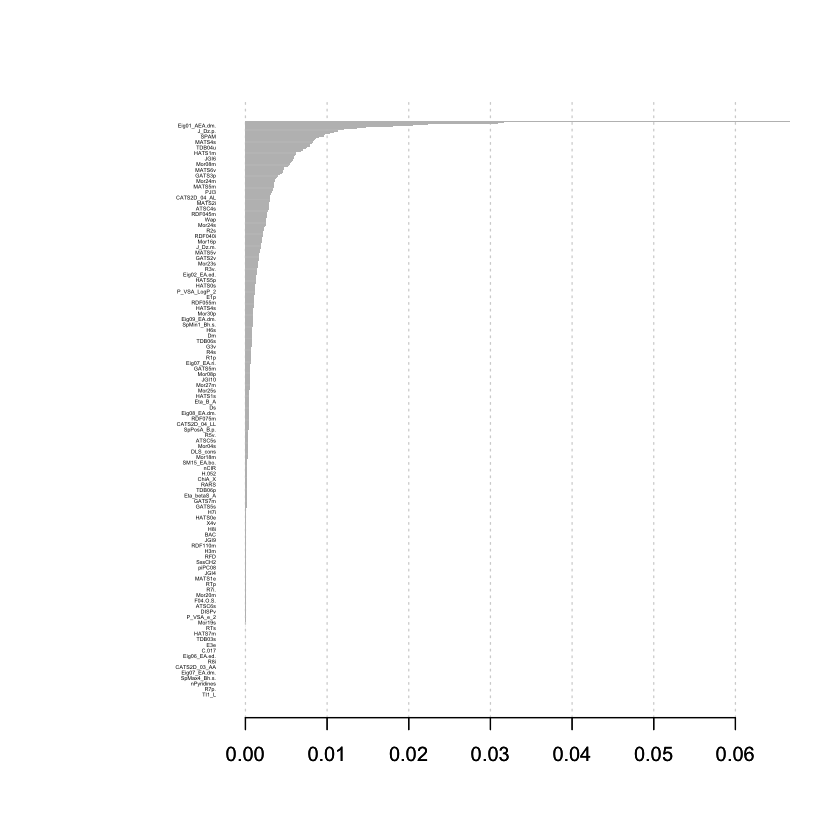

In [56]:
xgb.plot.importance(xgb.importance(model = boost.pleas))

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




[1] 0.8916383

--> error is larger than the one with boosting : bossting give us the best model. 